## Импорт библиотек

In [2]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.optimize import linprog
from sympy import *

## Решение методом линейного программирования библиотеки `scipy`

In [3]:
# Set up values relating to both minimum and maximum values of y
coefficients_inequalities = [[ 3, 5], # require 0.1*x + 0.2*y <= 10
                             [ 4, 4],
                             [ 2, 1],
                             [-3, 2],]
constants_inequalities = [18, 16, 6, 3]
bounds_x = [0, None]  # require x1 >= 0
bounds_y = [0, None]  # require x2 >= 0

z1 = [-4, -1]  # minimize, so explore negative
res1 = linprog(z1,
              A_ub=coefficients_inequalities,
              b_ub=constants_inequalities,
              bounds=(bounds_x, bounds_y))


z2 = [-1, -4]  # minimize, so explore negative
res2 = linprog(z2,
              A_ub=coefficients_inequalities,
              b_ub=constants_inequalities,
              bounds=(bounds_x, bounds_y))

print('Максимальное значение z1 =', -res1.fun)
print(f'При значениях x1 = {res1.x[0]}, x1 = {res1.x[1]}')
print('При этом значение z2 =', -res1.x[0]*z2[0] - res1.x[1]*z2[1])
print()

print('Максимальное значение z2 =', -res2.fun)
print(f'При значениях x1 = {res2.x[0]}, x1 = {res2.x[1]}')
print('При этом значение z1 =', -res2.x[0]*z1[0] - res2.x[1]*z1[1])
print()

Максимальное значение z1 = 12.0
При значениях x1 = 3.0, x1 = 0.0
При этом значение z2 = 3.0

Максимальное значение z2 = 13.0
При значениях x1 = 1.0, x1 = 3.0
При этом значение z1 = 7.0



## Графическое отображение решения

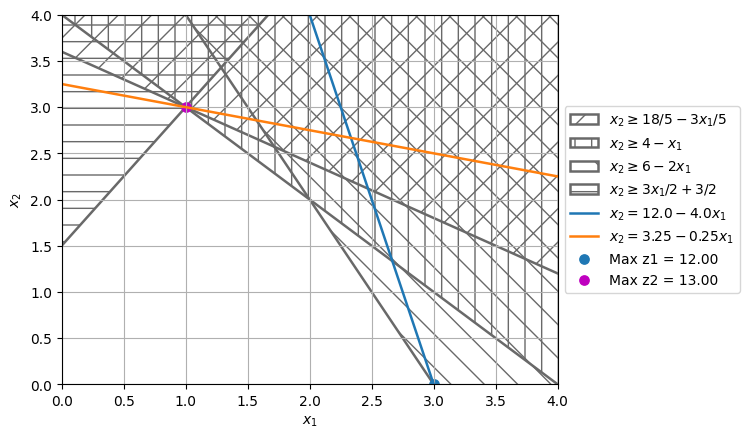

In [7]:
MaxX = max(res1.x[0], res2.x[0], *filter(lambda x: not x is None, bounds_x))
MinX = min(res1.x[0], res2.x[0], *filter(lambda x: not x is None, bounds_x))

MaxY = max(res1.x[1], res2.x[1], *filter(lambda x: not x is None, bounds_y))
MinY = min(res1.x[1], res2.x[1], *filter(lambda x: not x is None, bounds_y))    
def plot(expr, style):
    [solv_x2] = solve(expr, x2)
    x2_func = lambdify([x1], solv_x2, 'numpy')
    if not style is None:
        plt.fill_between(array, x2_func(array), MaxX*10, label = rf'$x_2 \geq {solv_x2}$'.
             replace('x1','x_1').replace('*',r''), facecolor="none", 
                     hatch=style[0], edgecolor=style[1], 
                     linestyle='-' ,linewidth=1.8)
    else:
        plt.plot(array, x2_func(array), label = rf'$x_2 = {solv_x2}$'.
             replace('x1','x_1').replace('*',r''), linestyle='-' ,linewidth=1.8)
    plt.xlabel('$x_1$')
    plt.ylabel('$x_2$')
    
x1, x2 = symbols('x1, x2')
array = np.linspace(MinX-10, MaxX*10, 100)
color = 'dimgray'
style = [['/',color],['|',color],['\\',color],['-',color]]
for i in range(len(coefficients_inequalities)):
    expr =    coefficients_inequalities[i][0] * x1 \
            + coefficients_inequalities[i][1] * x2 \
            - constants_inequalities[i] 
    plot(expr, style.pop(0))
    
plot(-z1[0] * x1 - z1[1] * x2 + res1.fun, None)
plot(-z2[0] * x1 - z2[1] * x2 + res2.fun, None)

plt.scatter(res1.x[0], res1.x[1], s=45, label = f'Max z1 ={-res1.fun: .2f}')
plt.scatter(res2.x[0], res2.x[1], s=45, label = f'Max z2 ={-res2.fun: .2f}', facecolor='m' )

plt.legend(loc = 'center left', bbox_to_anchor = (1,0.5))    
plt.grid()
plt.xlim([0, 4])
plt.ylim([0, 4])

plt.show()

Тут заштрихована область, которая не подходит под ограничения из условия.  
Допустимая область НЕ заштрихована